## **[Week 5] Maximum Likelihood Estimation (MLE) vs Maximum A Posteriori (MAP)**

In this practice session, we will cover the following:
- Understand the basic concept of maximum likelihood estimation (MLE) and maximum a posteriori (MAP)
- Observe how the priors affect the results in MAP with the simple coin toss example

**[Important]** \\
The results of the exercises should be included in your weekly report for this practice session.
The weekly report for this session should be submitted to KLMS by this weekend. No late submission would be accepted.

### Recap. What are MLE and MAP?
##### 1) Objective
We sample parametrized i.i.d. random variables $\{x_i\}$ and estimate the parameters from samples.
##### 2) Likelihood
If we denote samples to $x=\{x_i\}$ and parameters to $\theta$, then likelihood $L(x|\theta)=\prod_i L(x_i|\theta)$, where $L(x_i|\theta)$ is either PMF (discrete) or PDF (continuous). We can calculate this because we assume a certain distribution without knowledge of parameter values.
##### 3) MLE
We consider $L(x|\theta)$ as a function of $\theta$ and find $\theta$ s.t. maximizes it; we can analytically derive it using derivatives or just numerically derive it using computer softwares such as Python (we will do this).
##### 4) MAP
In the Bayesian approach, we consider parameters as random variables. We want to derive $p(\theta|x)$, which is called posterior because it is the distribution after observing the data. By Bayes' theorem, $p(\theta|x)=\frac{p(x|\theta)p(\theta)}{p(x)}$. Observe that $p(x|\theta) \propto L(x|\theta)$ and $p(x)$ is constant with respect to $\theta$ although we cannot derive it easily. Hence, $p(\theta|x)\propto L(x|\theta)p(\theta)$ so that a maximizer $\theta^{\star}:=\arg\max_{\theta}p(\theta|x)=\arg\max_{\theta}L(x|\theta)p(\theta)$, and we call such maximizer MAP and we call $p(\theta)$ prior because it is the distribution before data observation. As we can easily guess, if the prior is uniform then MAP coincides with MLE.
##### 5) In a coin toss case
For coin toss, we assume the i.i.d. tosses, which means that we assume i.i.d. Bernouilli distribution $\text{Bern}(p)$ ($p$ is considered as a parameter, which takes the role of $\theta$ for general case). while the likelihood is $p^x (1-p)^{(n-x)}$ when the heads appeared x times out of n tosses. Note that $L(x|p)\propto \text{Beta}(p;\alpha, \beta)$, where $\alpha=x+1$ and $\beta=n-x+1$ because $\text{Beta}(p;\alpha, \beta)=\frac{1}{B(\alpha, \beta)}p^{\alpha-1}(1-p)^{\beta-1}$. Also, the product of PDF of two beta distributions is also beta PDF. <br>
We cannot know the prior, but we may **believe in** certain distributions, like Gaussian, beta, truncated uniform, $\cdots$. In this session, our belief is that the coin is fair or close to fair, which means that $\hat{p}$, which is the estimate of $p$ is 0.5, thus the mode of the prior is 0.5.
##### 6) Analytic vs numerical approach to find MLE or MAP
Analytic approach: likelihood and posterior are closed forms for our cases-take derivative (or take logarithm first) to find extrema and check if they are global maxima <br>
Numerical approach: since $0\leq p\leq 1$, we equally slice $[0,1]$ into certain number of pieces (10000 for our case) and get likelihood or posterior for each p value and find what p value achieves maximum among them

### 1. Preparations

First, we need to import the required packages

In [2]:
import numpy as np                                  # Tool for calculations and arrays
from scipy.stats import bernoulli, beta, norm       # Tool for handling probability distributions
import matplotlib.pyplot as plt                     # Tool for plot and visualization

### 2. Define Key Functions

In this section, we define functions used below. Here are many exercises and you have to implement correctly for

#### 2-1. p and coin toss

First define **p**, an array consists of possible p values from 0 to 1, interval 0.0001 (=1/10000). This is crucial for numerical derivation of MLE and MAP.

**coin_toss** is a function that <br>
input: {n: number of coin tosses, p_real: the exact value of p in Bernoulli distribution, seed: to fix the result}, <br>
output: a series of coin toss result and the number of heads. <br>

You may specify the seed value for reproducibility, or just remain it blank to make the result different for each run.

In [3]:
p=np.linspace(0, 1, num=10001)

def coin_toss(n, p_real, seed=None):
    # Generate n Bernoulli samples (1 for head, 0 for tail)
    result = bernoulli.rvs(p_real, random_state=seed, size=n)

    # Count the number of heads
    num_heads = result.sum()

    return result, num_heads

In [4]:
coin_toss(n=10, p_real=0.5, seed=0)

(array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0]), 7)

#### 2-2. MLE

**Exercise 1.** Implement `likelihood`, which has <br>
input: {x: number of heads, n: number of tosses, p: an 1D array defined above}, <br>
output: An 1D array that outputs likelihood for each element in p.

Note that the likelihood concerns the **order** of the coin tosses, which means that (H, T) is a different event from (T, H) while x and n are the same. <br>
You can easily find the formula in above explanation. <br>
(Hint: although p is an array, in below code we can consider it as a single element in the sense that the code looks identitcal.)  

likelihood = $p^x * (1-p)^{n-x}$

In [5]:
def likelihood(x, n, p):
    ########## implement here ##########
    return (p ** x) * ((1 - p) ** (n - x))
    ####################################

In [6]:
likelihood(x=1, n=3, p=np.array([0.25, 0.5, 0.75]))

array([0.140625, 0.125   , 0.046875])

**Exercise 2.** Implement `calculate_MLE`, which has <br>
Implement the function **calculate_MLE** that <br>
input: {x, n, p}, <br>
output: MLE, which is in $[0,1]$. <br>

Use **numerical approach** for this function. You may want to use **likelihood**.  <br>
(Hint: `np.argmax(array)` outputs the index that has the maximum entry value if an **array** is 1D (bool, int, or <U>float</U>) array)

MLE = p[argmax(likelihood)]

In [7]:
def calculate_MLE(x, n, p):
    ########## implement here ##########
    likelihood_values = likelihood(x, n, p)
    argmax_index = np.argmax(likelihood_values)
    return p[argmax_index]
    ####################################

In [8]:
calculate_MLE(x=1, n=3, p=np.array([0.25, 0.5, 0.75]))

0.25

#### 2-3. MAP

**prior** is a function that <br>
input: {p, mode: the type of distribution, param_1, param_2: parameters for beta and Gaussian distribution}, <br>
output: An 1D array that outputs the prior probability for each p value.

mode: {'uniform', 'beta' ,'Gaussian'} <br>
If mode='uniform', it uses uniform distribution on $[0,1]$. <br>
If mode='beta', it uses beta distribution, $\text{Beta}(p;\alpha,\beta)$ with $\alpha=\text{param}\_1$, $\beta=\text{param}\_2$.
If mode='Gaussian', it uses, Gaussian distribution, $\mathcal{N}(p;\mu,\sigma^2)$ with $\mu=\text{param}\_1$, $\sigma=\text{param}\_2$.

In [9]:
def prior(p, mode, param_1=1, param_2=1):
    if mode == 'uniform':
        return 1.0  # Uniform prior
    elif mode == 'beta':
        return beta.pdf(p, param_1, param_2)  # Beta prior
    elif mode == 'Gaussian':
        return norm.pdf(p, param_1, param_2)  # Gaussian prior


In [10]:
prior(p=np.array([0.25, 0.5, 0.75]), mode="Gaussian", param_1=0, param_2=1)

array([0.38666812, 0.35206533, 0.30113743])

**Exercise 3.** Implement `unnormalized_posterior`, which has <br>
input: {x, n, p}, <br>
output: An 1D array that outputs unnormalized posterior for each element in p.

See **Recap** for formula. Note that an elementwise product of two equal-sized arrays can be done by * (product) operator.

unnormalized_posterior = likelihood * prior

In [11]:
def unnormalized_posterior(x, n, p, mode, param_1=1, param_2=1):
    ########## implement here ##########
    likelihood_value = likelihood(x, n, p)
    prior_value = prior(p, mode, param_1, param_2)
    return likelihood_value * prior_value
    ####################################

In [12]:
unnormalized_posterior(x=1, n=3, p=np.array([0.25, 0.5, 0.75]), mode="Gaussian", param_1=0, param_2=1)

array([0.0543752 , 0.04400817, 0.01411582])

**Exercise 4.** Implement `calculate_MAP`, which has <br>
input: {x, n, p, mode, param_1, param_2}, <br>
output: MAP, which is in $[0,1]$.

It would be very helpful to implement this if you see **Exercise 2**. Also, you may want to use **unnormalized_posterior**.

MAP = p[argmax(unnormalized_posterior)]

In [13]:
def calculate_MAP(x, n, p, mode, param_1=1, param_2=1):
    ########## implement here ##########
    unnormalized_posterior_values = unnormalized_posterior(x, n, p, mode, param_1, param_2)
    argmax_index = np.argmax(unnormalized_posterior_values)
    return p[argmax_index]
    ####################################

In [14]:
calculate_MAP(x=1, n=3, p=np.array([0.25, 0.5, 0.75]), mode="Gaussian", param_1=0, param_2=1)

0.25

### 3. Small number of fair coin tosses

In this section, we will see the nature of MLE and MAP, especially the impact of the choice of prior, when $n$ is small.

#### 3-1. Coin toss situation and result

The exact p, p_real is 0.5 and the number of tosses $n=10$. We fix the case that only three out of ten coin tosses got heads by seed, but you may change the seed or just erase the seed for variation.

In [15]:
n = 10
p_real = 0.5
seed = 11

result, x = coin_toss(n, p_real, seed)

print('The result is:')
print(result)
print('The number of heads is', x)

The result is:
[0 0 0 1 0 0 0 0 1 1]
The number of heads is 3


#### 3-2. MLE estimation

We use MLE for the estimation of $p$. For the numerical method, we just use the above **calculate_MLE** function in task 1. <br>
For the analytic method, note that by taking the logarithm of likelihood and taking the derivative, we can easily get that **p_mle=x/n**. <br>
We check if both coincide and plot the likelihood function and MLE.

MLE of this coin toss is 0.3
MLE by analytic approach is 0.3 which coincides with the result from the numerical approach.


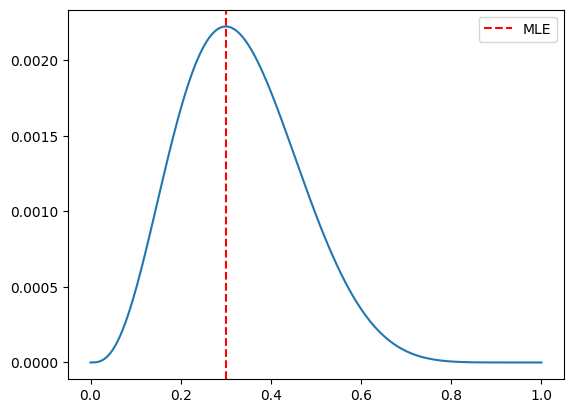

In [16]:
# Calculate MLE value numerically
p_mle_1 = calculate_MLE(x, n, p)
print('MLE of this coin toss is', p_mle_1)

# Check if the above value coincides to that by analytic approach
if p_mle_1 == x / n:
    print('MLE by analytic approach is', x / n, 'which coincides with the result from the numerical approach.')
else:
    print('MLE by analytic approach is', x / n, 'which does not coincide with the result from the numerical approach.')

# plot likelihood function and MLE
plt.plot(p, likelihood(x, n, p))
plt.axvline(x=p_mle_1, color='r', linestyle='--', label='MLE')
plt.legend()
plt.show()

#### 3-3. MAP estimation (1)

We use MAP for estimation now with **calculate_MAP** function. For each case, we compare MAP with MLP calculated above.

At first we use uniform prior.

In [17]:
# Calculate MAP with uniform prior
p_map_1_1 = calculate_MAP(x, n, p, mode='uniform')

# Print results for uniform prior
print('MAP of this coin toss with a uniform prior is', p_map_1_1)

if p_map_1_1 == p_mle_1:
    print('The MLE is', p_mle_1, 'which coincides with the MAP.')
else:
    print('The MLE is', p_mle_1, 'which does not coincide with the MAP.')

MAP of this coin toss with a uniform prior is 0.3
The MLE is 0.3 which coincides with the MAP.


#### 3-4. MAP estimation (2)

Next, we use nonuniform priors. Especially, we use beta and Gaussian priors, which are used frequently for cases like ours. <br>
We believe that the coin is **fair**, which means p_real is 0.5.
Use $\text{Beta}(20, 20)$ and $\mathcal{N}(0.5, 0.05^2)$. Both has mode 0.5 and symmetric bell shape.

Before we move on, see the PDFs of such two priors.

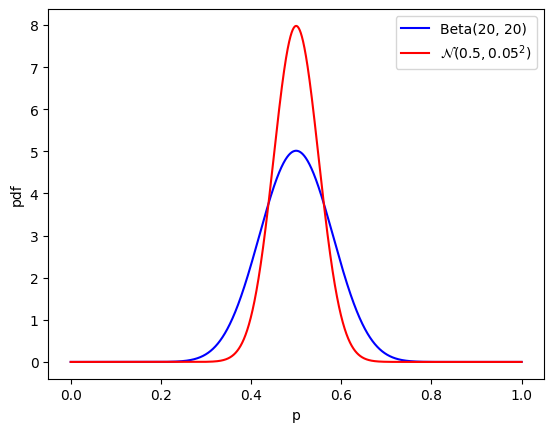

In [18]:
# Plot Beta(20, 20)
plt.plot(p, beta.pdf(p, 20, 20), color='b', label='Beta(20, 20)')

# Plot N(0.5, 0.05^2); clipped but not significant
plt.plot(p, norm.pdf(p, 0.5, 0.05), color='r', label='$\mathcal{N}(0.5, 0.05^2)$')

# Labels and Legend
plt.xlabel('p')
plt.ylabel('pdf')
plt.legend()

# Show the plot
plt.show()

Then calculate MAP with such priors. Compare two MAPs and MLE. Also observe that how much the PDF of the prior concentrated near 0.5 (you can see it right above) affects MAP.

In [19]:
# Calculate MAP with Beta(20, 20) prior
p_map_1_2 = calculate_MAP(x, n, p, mode='beta', param_1=20, param_2=20)

# Calculate MAP with N(0.5, 0.05^2) prior
p_map_1_3 = calculate_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05)

# Print results for Beta(20, 20) prior
print('MAP of this coin toss with Beta(20, 20) prior is', p_map_1_2)
if p_map_1_2 == p_mle_1:
    print('MLE is', p_mle_1, 'which coincides with MAP.')
else:
    print('MLE is', p_mle_1, 'which does not coincide with MAP.')

# Print results for N(0.5, 0.05^2) prior
print('MAP of this coin toss with N(0.5, 0.05^2) prior is', p_map_1_3)
if p_map_1_3 == p_mle_1:
    print('MLE is', p_mle_1, 'which coincides with MAP.')
else:
    print('MLE is', p_mle_1, 'which does not coincide with MAP.')


MAP of this coin toss with Beta(20, 20) prior is 0.45830000000000004
MLE is 0.3 which does not coincide with MAP.
MAP of this coin toss with N(0.5, 0.05^2) prior is 0.4818
MLE is 0.3 which does not coincide with MAP.


#### 3-5. Visualization (1)

To reduce the repetition of lengthy codes, we predefine the main part. <br>
This graph consists of <br>
points: p_real (black), MLE (yellow), mode of prior (red), MAP (cyan) (dashed vertical lines) <br>
graphs: likelihood (blue), prior (green), posterior (magenta) (curves; maximum value is normalized to 1 for easier comparison)


In [20]:
def plot_MAP(x, n, p, mode, param_1, param_2, p_mle, p_map, prior_mode, corrected=False):

    # Exact p value
    plt.axvline(x=p_real, color='k', linestyle='--', label='True p value')

    # Likelihood graph
    likelihood_values = likelihood(x, n, p) / likelihood(x, n, p_mle)
    plt.plot(p, likelihood_values, color='b', label='Likelihood')
    plt.axvline(x=p_mle, color='y', linestyle='--', label='MLE')

    # Prior graph
    prior_values = prior(p, mode=mode, param_1=param_1, param_2=param_2) / \
                   prior(prior_mode, mode=mode, param_1=param_1, param_2=param_2)
    if corrected:
        prior_label = 'beta (corrected) prior'
    else:
        prior_label = f'{mode} prior'
    plt.plot(p, prior_values, color='g', label=prior_label)
    plt.axvline(x=prior_mode, color='r', linestyle='--', label=f'Mode of {prior_label}')

    # Posterior graph
    posterior_values = unnormalized_posterior(x, n, p, mode=mode, param_1=param_1, param_2=param_2) / \
                       unnormalized_posterior(x, n, p_map, mode=mode, param_1=param_1, param_2=param_2)
    if corrected:
        posterior_label = 'Posterior with beta (corrected) prior'
    else:
        posterior_label = f'Posterior with {mode} prior'
    plt.plot(p, posterior_values, color='m', label=posterior_label)
    plt.axvline(x=p_map, color='c', linestyle='--', label=f'MAP with {posterior_label}')

    # Graph visualization
    plt.legend(fontsize='8', framealpha=0.5)
    plt.title(f'{posterior_label}')
    plt.xlabel('p')
    plt.ylabel('Normalized Probability / Function Value')
    plt.show()

#### 3-6. Visualization (2)

Now we see the full graph. Note that p_real (black) is invisible because it coincides to mode of prior (red) and thus overwritten.

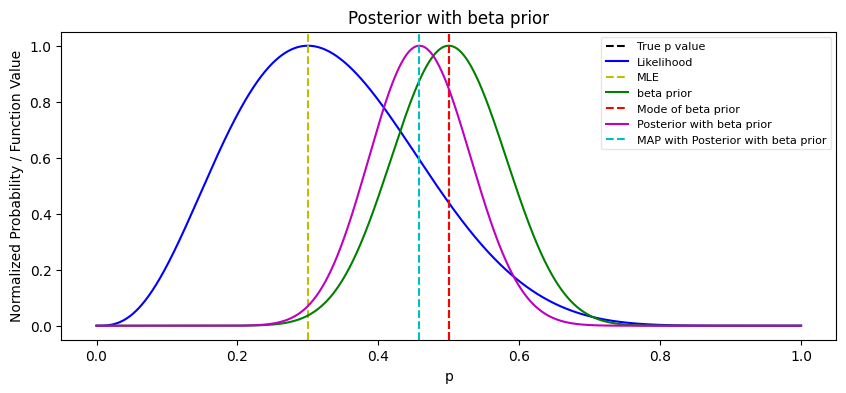

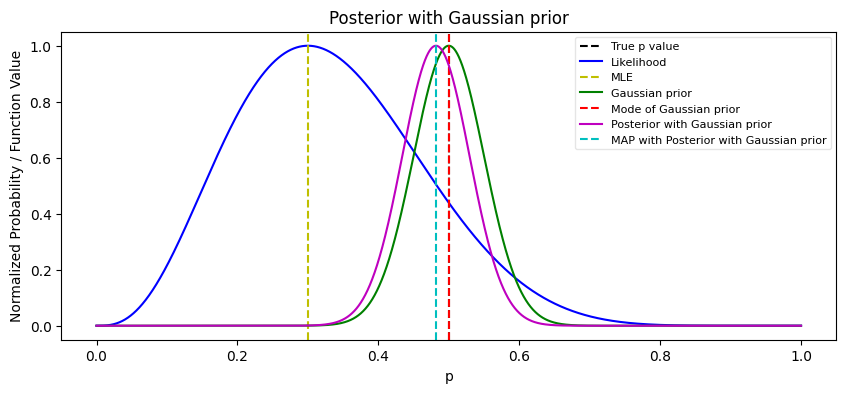

In [21]:
# Plot graph of MAP with beta prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='beta', param_1=20, param_2=20, p_mle=p_mle_1, p_map=p_map_1_2, prior_mode=0.5)


# Plot graph of MAP with Gaussian prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05, p_mle=p_mle_1, p_map=p_map_1_3, prior_mode=0.5)

plt.show()

### 4. Large number of fair coin tosses

In this section, we will see the nature of MLE and MAP, especially the impact of the choice of prior, when $n$ is large. We focus on the changes compare to **3**. <br>
We use same priors except for uniform because by both analytically and numerically, we have already seen that MAP with uniform prior is equivalent to MLE.

#### 4-1. Coin toss situation and result

p_real is still 0.5 and the number of tosses $n$ is increased from 10 to 100 compared to **3**. We do not set the seed and feel free to execute repeatedly (before moving on to **5** or later) to observe diverse results.

In [22]:
n = 100
p_real = 0.5
seed = None # no seed for this case

result, x = coin_toss(n, p_real, seed)

print('The result is:')
print(result)
print('The number of heads is', x)

The result is:
[1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0]
The number of heads is 52


#### 4-2. MLE and MAP estimation

We perform MLE and MAP with two nonuniform priors used in **3-4**. Observe the different behavior, especially how much the MAPs are closer to 0.5 than MLE compared to those in **3-4**.

In [23]:
# Calculate MLE
p_mle_2 = calculate_MLE(x, n, p)
print('MLE of this coin toss is', p_mle_2)

# Calculate MAP with Beta(20, 20) prior
p_map_2_2 = calculate_MAP(x, n, p, mode='beta', param_1=20, param_2=20)
print('MAP of this coin toss with Beta(20, 20) prior is', p_map_2_2)

# Calculate MAP with N(0.5, 0.05^2) prior
p_map_2_3 = calculate_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05)
print('MAP of this coin toss with N(0.5, 0.05^2) prior is', p_map_2_3)

MLE of this coin toss is 0.52
MAP of this coin toss with Beta(20, 20) prior is 0.5145000000000001
MAP of this coin toss with N(0.5, 0.05^2) prior is 0.51


#### 4-3. Visualization

The settings are as same as **3-6**. Find the differences from **3-6**.

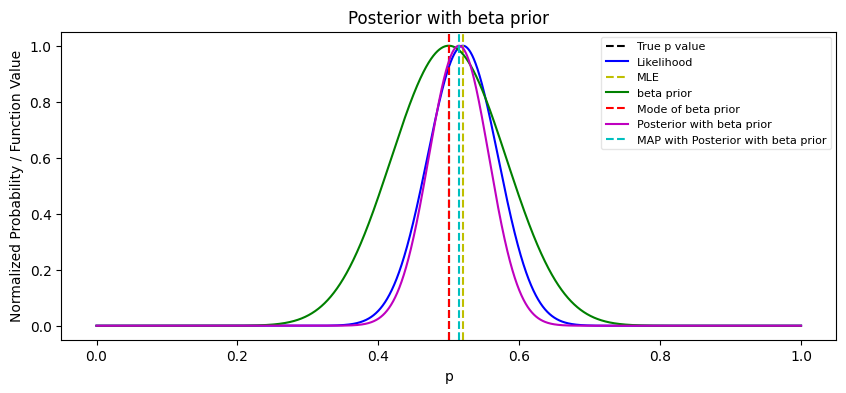

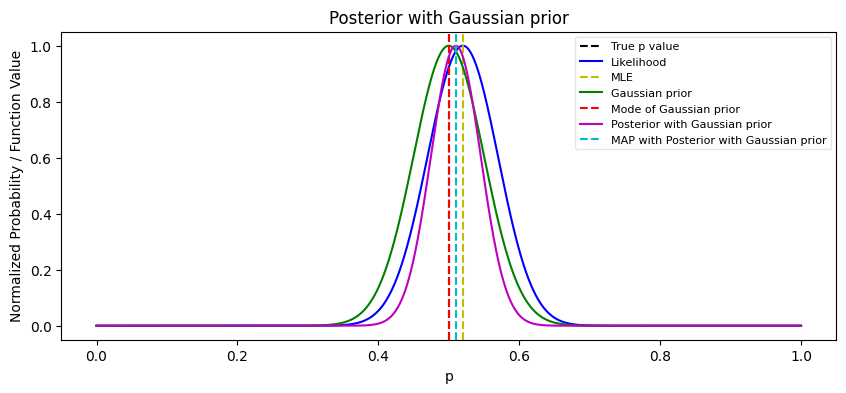

In [24]:
# Plot graph of MAP with beta prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='beta', param_1=20, param_2=20, p_mle=p_mle_2, p_map=p_map_2_2, prior_mode=0.5)


# Plot graph of MAP with Gaussian prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05, p_mle=p_mle_2, p_map=p_map_2_3, prior_mode=0.5)

plt.show()

### 5. Medium number of unfair coin tosses

In this section, we will see the nature of MLE and MAP, especially the impact of the choice of prior, when $n$ is medium and the coin is **unfair**. <br>
The settings other than n, p_real, and seed are identical to **4**.

#### 5-1. Coin toss situation and result

From now on, the coin is unfair; p_real is now increased to 0.7 and the number of tosses $n$ is 20. We fix the case that thirteen out of twenty coin tosses got heads by seed, but you may change the seed or just erase the seed for variation. However, if so, it does not match to prior correction in **6**, so keep in mind or if you want to link it, then change the parameters in **6** as explained there.

In [25]:
n = 20
p_real = 0.7
seed = 6

result, x = coin_toss(n, p_real, seed)

print('The result is:')
print(result)
print('The number of heads is', x)

The result is:
[0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0]
The number of heads is 13


#### 5-2. MLE and MAP estimation

We perform MLE and MAP with two nonuniform priors used in **3-4** and **4-2**. Observe the different behavior due to the wrong belief reflected to priors.

In [26]:
# Calculate MLE
p_mle_3 = calculate_MLE(x, n, p)
print('MLE of this coin toss is', p_mle_3)

# Calculate MAP with Beta(20, 20) prior
p_map_3_2 = calculate_MAP(x, n, p, mode='beta', param_1=20, param_2=20)
print('MAP of this coin toss with Beta(20, 20) prior is', p_map_3_2)

# Calculate MAP with N(0.5, 0.05^2) prior
p_map_3_3 = calculate_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05)
print('MAP of this coin toss with N(0.5, 0.05^2) prior is', p_map_3_3)

MLE of this coin toss is 0.65
MAP of this coin toss with Beta(20, 20) prior is 0.5517000000000001
MAP of this coin toss with N(0.5, 0.05^2) prior is 0.5251


#### 5-3. Visualization

The settings are as same as **3-6** and **4-3**. Find the differences from **3-6** and **4-3**.

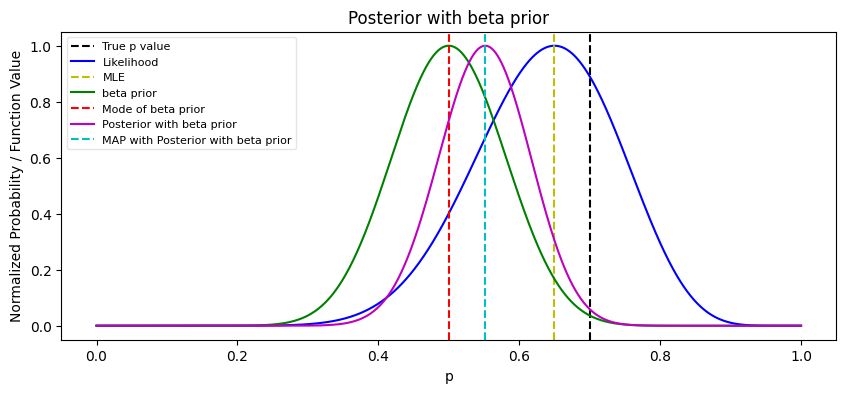

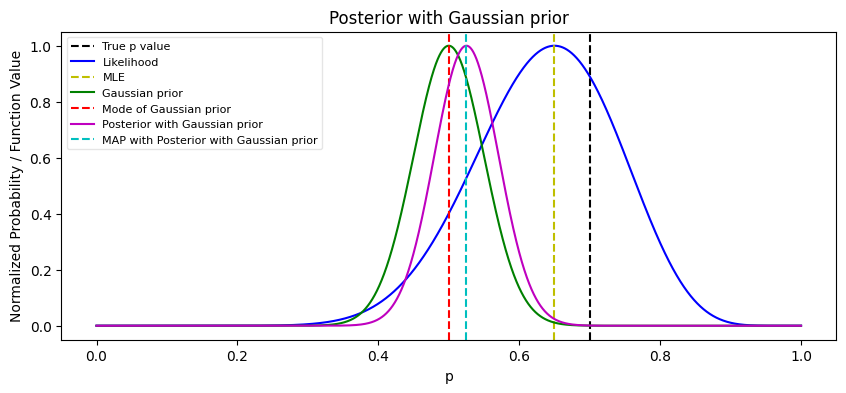

In [27]:
# Plot graph of MAP with beta prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='beta', param_1=20, param_2=20, p_mle=p_mle_3, p_map=p_map_3_2, prior_mode=0.5)


# Plot graph of MAP with Gaussian prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05, p_mle=p_mle_3, p_map=p_map_3_3, prior_mode=0.5)

plt.show()

### 6. Large number of unfair coin tosses with prior correction

In this section, we will see the nature of MLE and MAP, especially the impact of the choice of prior, when $n$ is large and the coin is **unfair**. <br>
The settings other than n, p_real, and seed are similar to **4** and **5** but there is one important difference: we added one more MAP with corrected prior.

Corrected prior is made by the observation in **5**. Since in **5** there were 13 heads and 7 tails, we use its likelihood as prior after normalization. <br>
Then, our prior becomes $\text{Beta}(14, 8)$. If you want not to set the seed in **5** and link the observations here, then use this formula for corrected prior: $\text{Beta}(x+1,n-x+1)$ and change the mode of prior to x/n in **6-3**.

#### 6-1. Coin toss situation and result

p_real is still 0.7 and the number of tosses $n$ is increased from 20 to 100. We do not set the seed and feel free to execute repeatedly to observe diverse results.

In [28]:
n = 100
p_real = 0.7
seed = None

result, x = coin_toss(n, p_real, seed)

print('The result is:')
print(result)
print('The number of heads is', x)

The result is:
[0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1]
The number of heads is 70


#### 6-2. MLE and MAP estimation

We perform MLE and MAP with two nonuniform priors used in **3-4** and **4-2** plus the corrected prior. Observe the different behaviors among MAPs with different prior.

In [29]:
# Calculate MLE
p_mle_4 = calculate_MLE(x, n, p)
print('MLE of this coin toss is', p_mle_4)

# Calculate MAP with Beta(20, 20) prior (uncorrected)
p_map_4_2 = calculate_MAP(x, n, p, mode='beta', param_1=20, param_2=20)
print('MAP of this coin toss with Beta(20, 20) prior is', p_map_4_2)

# Calculate MAP with N(0.5, 0.05^2) prior
p_map_4_3 = calculate_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05)
print('MAP of this coin toss with N(0.5, 0.05^2) prior is', p_map_4_3)

# Calculate MAP with Beta(14, 8) prior (corrected)
p_map_4_4=calculate_MAP(x, n, p, mode='beta', param_1=14, param_2=8)
print('MAP of this coin toss with Beta(14,8) (corrected) prior is', p_map_4_4)

MLE of this coin toss is 0.7000000000000001
MAP of this coin toss with Beta(20, 20) prior is 0.6449
MAP of this coin toss with N(0.5, 0.05^2) prior is 0.6021000000000001
MAP of this coin toss with Beta(14,8) (corrected) prior is 0.6917


#### 6-3. Visualization

See the graphs. Focus on how the corrected prior impact on MAP by comparing it to MAPs with different priors.

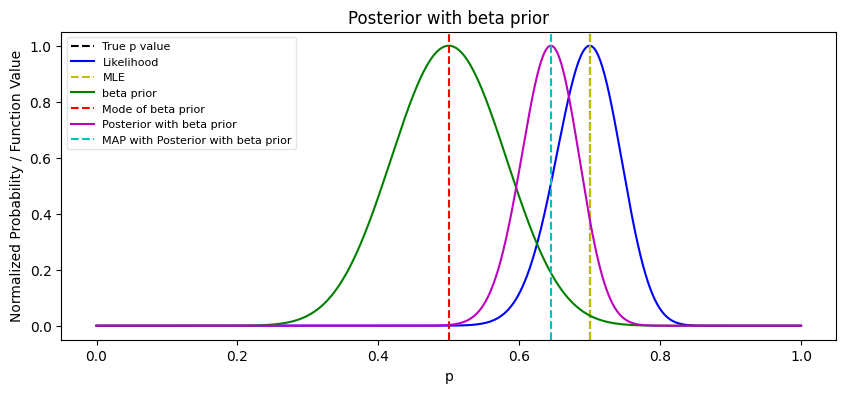

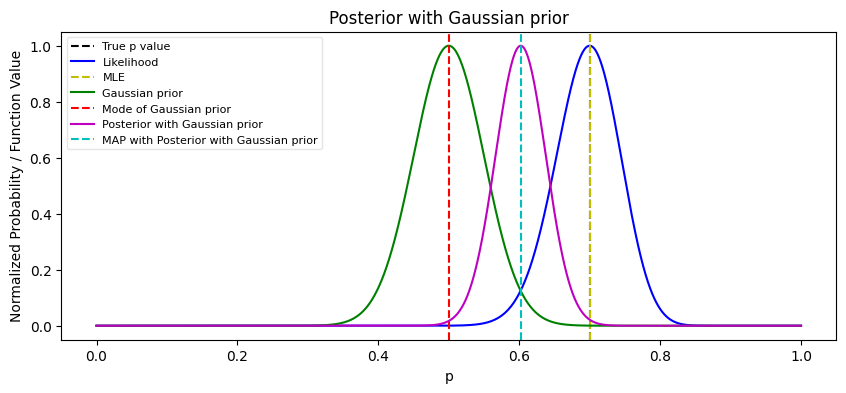

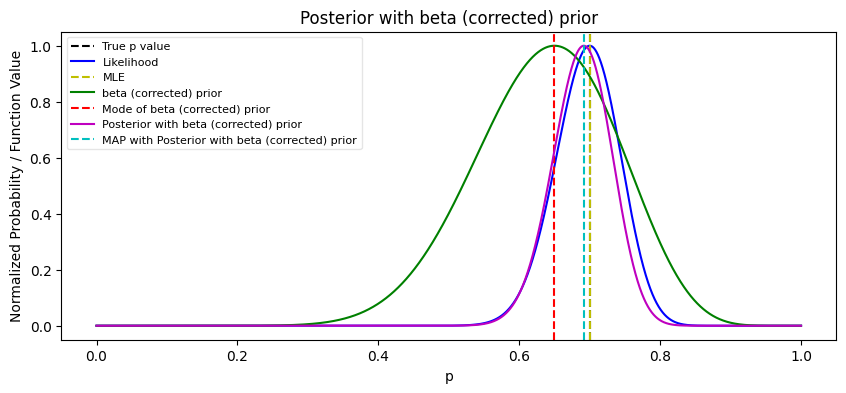

In [30]:
# Plot graph of MAP with beta prior (uncorrected)
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='beta', param_1=20, param_2=20, p_mle=p_mle_4, p_map=p_map_4_2, prior_mode=0.5)

# Plot graph of MAP with Gaussian prior
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='Gaussian', param_1=0.5, param_2=0.05, p_mle=p_mle_4, p_map=p_map_4_3, prior_mode=0.5)

# Plot graph of MAP with beta prior (corrected)
fig = plt.figure(figsize=(10, 4))
plot_MAP(x, n, p, mode='beta', param_1=14, param_2=8, p_mle=p_mle_4, p_map=p_map_4_4, prior_mode=0.65, corrected=True) # mode of Beta(14,8)=(14-1)/(14+8-2)=0.65


plt.show()